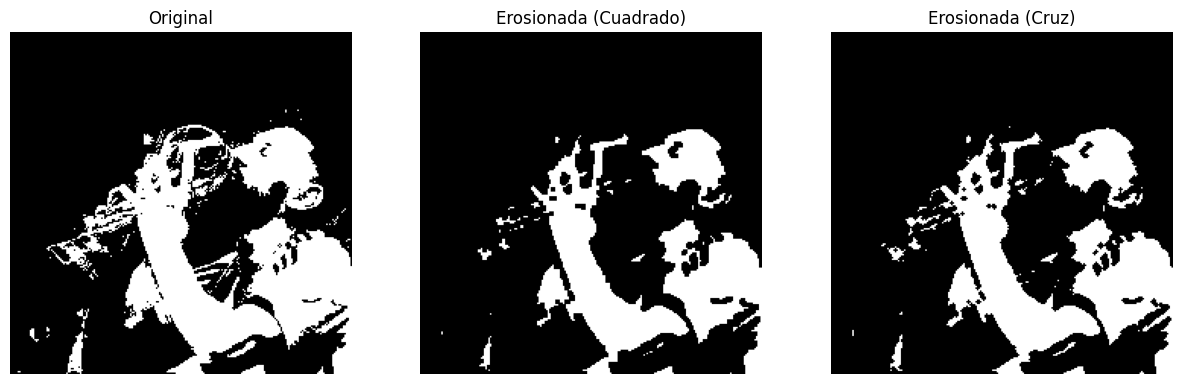

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para leer la matriz desde un archivo de texto
def leer_matriz_desde_txt(ruta_txt):
    with open(ruta_txt, 'r') as archivo:
        lineas = archivo.readlines()
        matriz = [list(map(int, linea.strip().split())) for linea in lineas]
    return np.array(matriz, dtype=np.uint8)

# Función para mostrar tres imágenes lado a lado
def mostrar_imagenes_lado_a_lado(img1, img2, img3, titulo1="Original", titulo2="Erosionada (Cuadrado)", titulo3="Erosionada (Cruz)"):
    plt.figure(figsize=(15, 5))
    
    # Mostrar imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(titulo1)
    plt.axis('off')
    
    # Mostrar imagen erosionada con kernel cuadrado
    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(titulo2)
    plt.axis('off')
    
    # Mostrar imagen erosionada con kernel cruz
    plt.subplot(1, 3, 3)
    plt.imshow(img3, cmap='gray')
    plt.title(titulo3)
    plt.axis('off')
    
    plt.show()

# Ruta del archivo de texto
ruta_txt = 'info_GOAT_bin.txt'

# Leer la matriz binaria desde el archivo de texto
matriz = leer_matriz_desde_txt(ruta_txt)


# Convertir la matriz a una imagen
imagen = matriz * 255  # Convertir valores 0 y 1 a 0 y 255 para la imagen binaria

# Definir el kernel cuadrado (un cuadrado de 3x3)
kernel_cuadrado = np.ones((3, 3), np.uint8)

# Definir el kernel cruz (una cruz de 3x3)
kernel_cruz = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], np.uint8)

# Aplicar la erosión con kernel cuadrado
imagen_erosionada_cuadrado = cv2.erode(imagen, kernel_cuadrado, iterations=1)

# Aplicar la erosión con kernel cruz
imagen_erosionada_cruz = cv2.erode(imagen, kernel_cruz, iterations=1)

# Mostrar las imágenes original y erosionadas
mostrar_imagenes_lado_a_lado(imagen, imagen_erosionada_cuadrado, imagen_erosionada_cruz)

# Guardar las imágenes
cv2.imwrite('img/matriz_original.png', imagen)
cv2.imwrite('img/matriz_erosionada_cuadrado.png', imagen_erosionada_cuadrado)
cv2.imwrite('img/matriz_erosionada_cruz.png', imagen_erosionada_cruz)
